In [11]:
import pandas as pd
col_names = ['preg', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima = pd.read_csv("pima-indians-diabetes.data", header=None, names=col_names)
pima.head()

,preg,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
feature_cols = ['preg', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
x = pima[feature_cols]
y = pima.label

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)  # apply scaling on training data
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('logisticregression', LogisticRegression())])
pipe.score(x_test, y_test)  # apply scaling on testing data, without leaking training data.

0.8246753246753247

In [15]:
# Standardization of dataset
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(x_train)

#Scaled data has zero mean and unit variance:

In [16]:
# Not using this block as our data is not directly standardized

# from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression()

# logreg.fit(scaler, y_train)

# y_pred=logreg.predict(x_test)
# print("Predicted Test Results :", y_pred)
# print("-"*20)


In [17]:
y_pred = pipe.predict(x_test)

In [18]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[98,  9],
       [18, 29]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

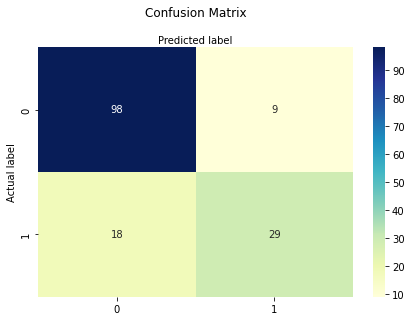

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#called as magic function we can use matplot lib in any line now

class_names= ['Diabetese', 'No-diabetese']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [20]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Accuracy: ", metrics.f1_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.8246753246753247
Accuracy:  0.6823529411764706
Precision:  0.7631578947368421
Recall:  0.6170212765957447


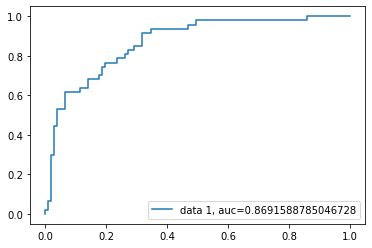

In [22]:
#ROC - Receiver Operating Characteristic curve is a plot of the true
# positive rate againt the false positive rate.
# It shows the tradeoff between sensitivity and specificity

# AUC score for our case is 0.86
# AUC score of 1 represents perfect classifier
# and of 0.5 represents a worthless classifier

y_pred_proba = pipe.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, label ="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()